In [1]:
import pandas as pd

In [42]:
df=pd.read_csv('/content/%C3%89volution_de_la_consommation_brute_et_corrig%C3%A9e_2024-10-02_10-23 (2).csv',delimiter=';', parse_dates=[0])


In [43]:
df

,Date,Filière,Valeur (TWh)
0,1995-01-01,Consommation corrigée,"41,841"
1,1995-02-01,Consommation corrigée,"35,809"
2,1995-03-01,Consommation corrigée,"36,725"
3,1995-04-01,Consommation corrigée,"31,498"
4,1995-05-01,Consommation corrigée,"28,837"
...,...,...,...
709,2024-05-01,Consommation brute,"30,919"
710,2024-06-01,Consommation brute,"29,81"
711,2024-07-01,Consommation brute,"31,825"
712,2024-08-01,Consommation brute,"30,614"


In [44]:
df.columns

Index(['Date', 'Filière', 'Valeur (TWh)'], dtype='object')

In [45]:
df.dtypes

,0
Date,datetime64[ns]
Filière,object
Valeur (TWh),object


In [47]:
df['Valeur (TWh)'] = df['Valeur (TWh)'].str.replace(',', '.').astype(float)

In [48]:
df.dtypes

,0
Date,datetime64[ns]
Filière,object
Valeur (TWh),float64


In [49]:
df

,Date,Filière,Valeur (TWh)
0,1995-01-01,Consommation corrigée,41.841
1,1995-02-01,Consommation corrigée,35.809
2,1995-03-01,Consommation corrigée,36.725
3,1995-04-01,Consommation corrigée,31.498
4,1995-05-01,Consommation corrigée,28.837
...,...,...,...
709,2024-05-01,Consommation brute,30.919
710,2024-06-01,Consommation brute,29.810
711,2024-07-01,Consommation brute,31.825
712,2024-08-01,Consommation brute,30.614


<Axes: >

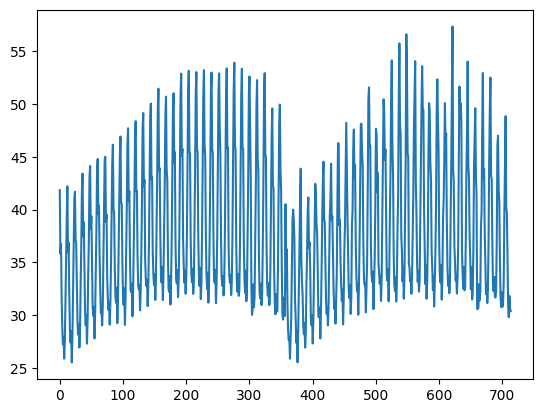

In [50]:
df['Valeur (TWh)'].plot()

In [51]:
print(df[['Date', 'Valeur (TWh)']].head(10))


        Date  Valeur (TWh)
0 1995-01-01        41.841
1 1995-02-01        35.809
2 1995-03-01        36.725
3 1995-04-01        31.498
4 1995-05-01        28.837
5 1995-06-01        27.240
6 1995-07-01        27.929
7 1995-08-01        25.889
8 1995-09-01        27.465
9 1995-10-01        31.429


In [52]:
df['rolling_mean'] = df['Valeur (TWh)'].rolling(window=12).mean()
df['rolling_std'] = df['Valeur (TWh)'].rolling(window=12).std()

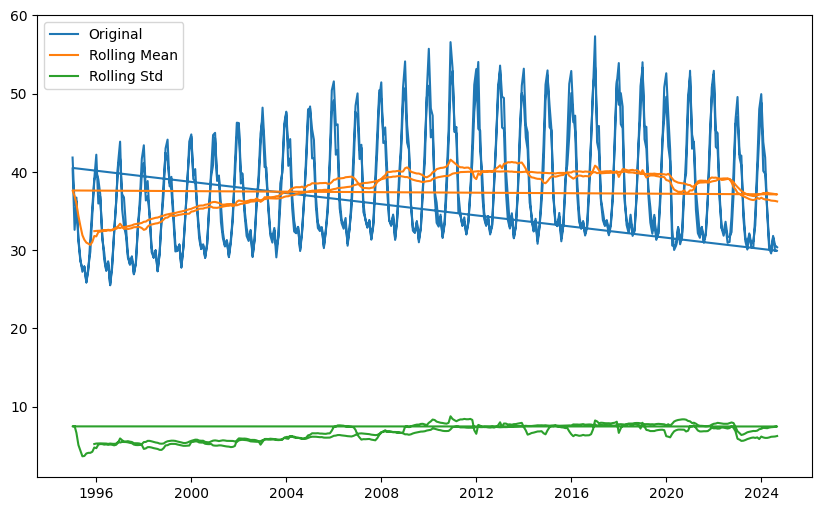

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(df['Date'],df['Valeur (TWh)'], label='Original')
plt.plot(df['Date'],df['rolling_mean'], label='Rolling Mean')
plt.plot(df['Date'],df['rolling_std'],label='Rolling Std')
plt.legend(loc = 'upper left')
plt.show()

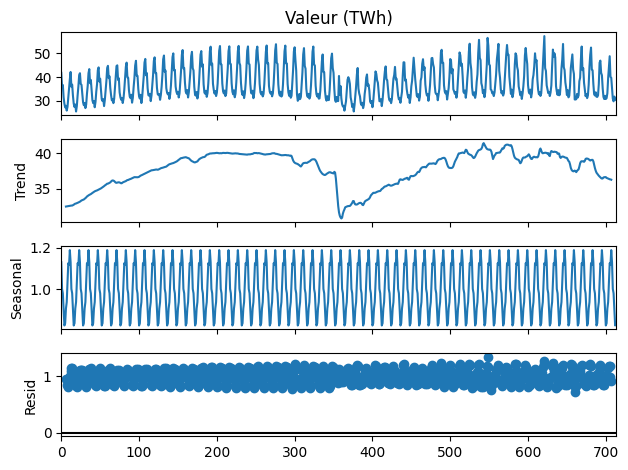

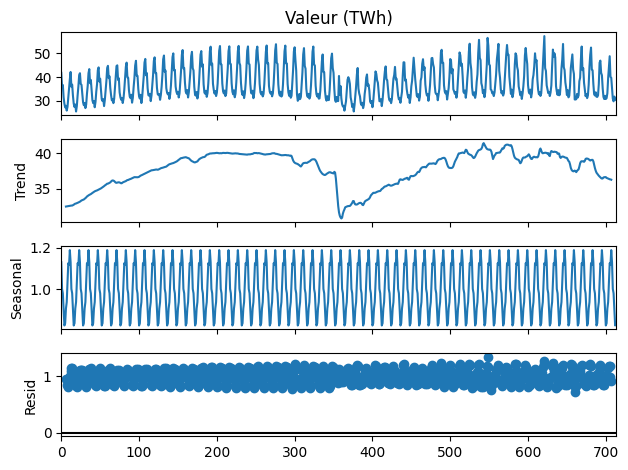

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
decAdd =seasonal_decompose(df['Valeur (TWh)'],period = 12,model='multiplcative')
decAdd.plot()

In [58]:
from statsmodels.tsa.stattools import adfuller
testStationarite = adfuller(df['Valeur (TWh)'])
testStationarite[1]

0.09860707092910115

In [60]:
df['diff'] = df['Valeur (TWh)'].diff()
df.head(12)

,Date,Filière,Valeur (TWh),rolling_mean,rolling_std,diff
0,1995-01-01,Consommation corrigée,41.841,NaN,NaN,NaN
1,1995-02-01,Consommation corrigée,35.809,NaN,NaN,-6.032
2,1995-03-01,Consommation corrigée,36.725,NaN,NaN,0.916
3,1995-04-01,Consommation corrigée,31.498,NaN,NaN,-5.227
4,1995-05-01,Consommation corrigée,28.837,NaN,NaN,-2.661
5,1995-06-01,Consommation corrigée,27.240,NaN,NaN,-1.597
6,1995-07-01,Consommation corrigée,27.929,NaN,NaN,0.689
7,1995-08-01,Consommation corrigée,25.889,NaN,NaN,-2.040
8,1995-09-01,Consommation corrigée,27.465,NaN,NaN,1.576
9,1995-10-01,Consommation corrigée,31.429,NaN,NaN,3.964


In [61]:
df['mean_diff'] = df['diff'].rolling(window=12).mean()
df['std_diff'] = df['diff'].rolling(window=12).std()

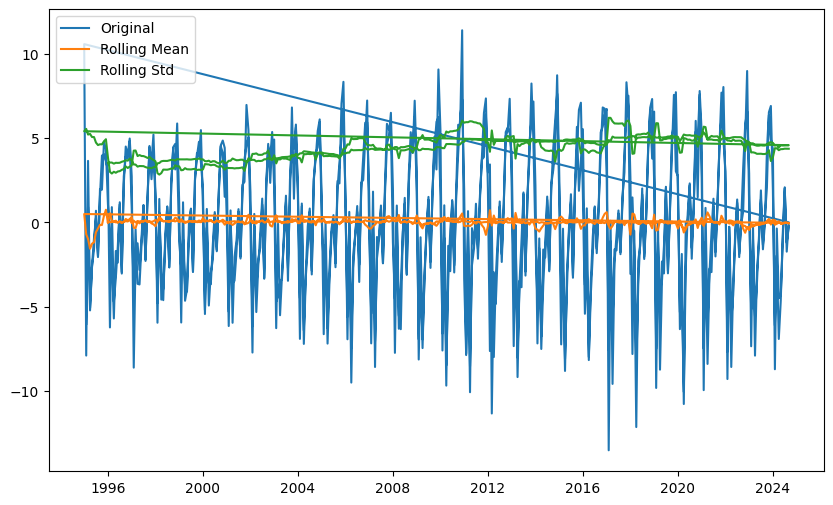

In [63]:
plt.figure(figsize = (10,6))
plt.plot(df['Date'],df['diff'], label='Original')
plt.plot(df['Date'],df['mean_diff'], label='Rolling Mean')
plt.plot(df['Date'],df['std_diff'],label='Rolling Std')
plt.legend(loc = 'upper left')
plt.show()

In [64]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00


In [65]:
from pmdarima import auto_arima
model = auto_arima(df['Valeur (TWh)'], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3530.139, Time=3.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4095.141, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4010.739, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4034.127, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4093.151, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3942.470, Time=2.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3486.807, Time=1.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3683.144, Time=0.99 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3479.554, Time=2.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3622.341, Time=1.06 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3540.546, Time=2.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3488.076, Time=4.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3847.580, Time=3.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : 

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Valeur (TWh)'], order=(4, 1, 5))
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Valeur (TWh)   No. Observations:                  714
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -1648.646
Date:                Sat, 19 Oct 2024   AIC                           3317.292
Time:                        23:31:12   BIC                           3362.987
Sample:                             0   HQIC                          3334.941
                                - 714                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4340      0.088      4.939      0.000       0.262       0.606
ar.L2          0.9460      0.064     14.796      0.000       0.821       1.071
ar.L3         -0.7771      0.065    -12.037      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


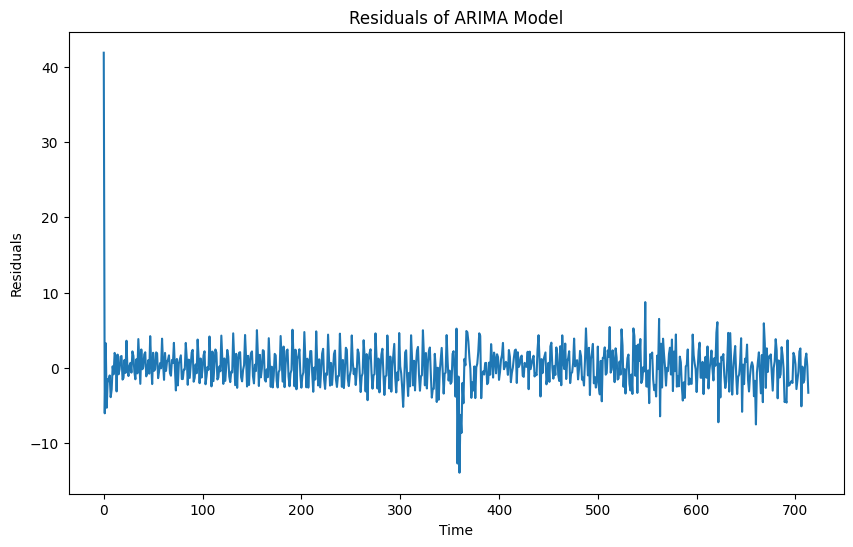

In [69]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [70]:
forecast = model_fit.forecast(12)

In [71]:
forecast

,predicted_mean
714,34.276113
715,40.511767
716,41.940317
717,44.315322
718,42.451814
719,40.924697
720,36.228391
721,33.487296
722,29.596090
723,29.418232


In [74]:
print(f"Forecasted value for {'month of November'}: {forecast[715]}")

Forecasted value for month of November: 40.51176748534564


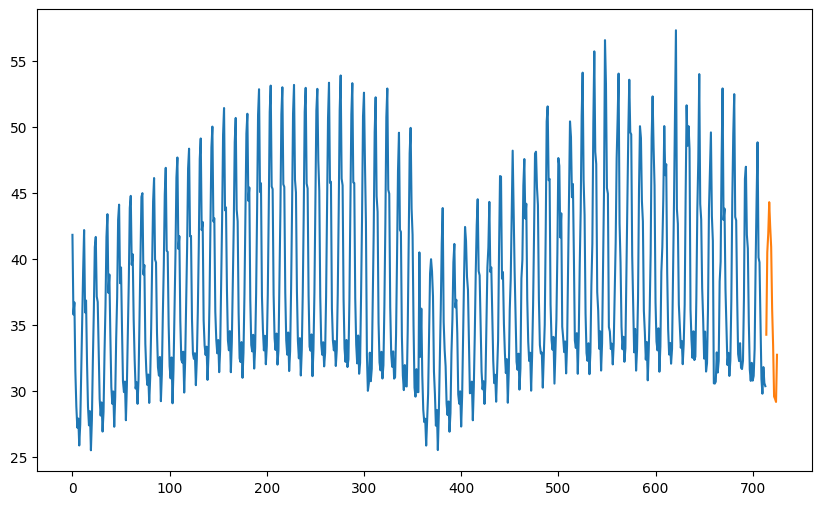

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(df['Valeur (TWh)'], label='Actual')
plt.plot(forecast, label='Forecast')